In [1]:
import pandas as pd
import requests
import time
import datetime
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 18,14


In [2]:
def convert_time(t):
    readable_time = datetime.datetime.fromtimestamp(t/1000.0).strftime('%Y-%m-%d %H:%M:%S')
    return(readable_time)

### Show Server Time


In [3]:
server_time = requests.get('https://api.binance.com/api/v1/time').json()['serverTime']

In [4]:
convert_time(server_time)

'2018-04-28 18:49:05'

### Payloads

In [5]:
symbol_payload = {'symbol':'XRPBTC'}
kline_payload= {'symbol':'XRPBTC','interval':'1w'}

### Get Current Prices

In [6]:
all_prices = requests.get('https://api.binance.com/api/v1/ticker/allPrices').json()

In [7]:
all_prices

[{'price': '0.07333900', 'symbol': 'ETHBTC'},
 {'price': '0.01628700', 'symbol': 'LTCBTC'},
 {'price': '0.00161830', 'symbol': 'BNBBTC'},
 {'price': '0.00824900', 'symbol': 'NEOBTC'},
 {'price': '0.03148000', 'symbol': 'QTUMETH'},
 {'price': '0.02771300', 'symbol': 'EOSETH'},
 {'price': '0.00023069', 'symbol': 'SNTETH'},
 {'price': '0.00699300', 'symbol': 'BNTETH'},
 {'price': '0.14902500', 'symbol': 'BCCBTC'},
 {'price': '0.00295400', 'symbol': 'GASBTC'},
 {'price': '0.02207400', 'symbol': 'BNBETH'},
 {'price': '9344.00000000', 'symbol': 'BTCUSDT'},
 {'price': '685.60000000', 'symbol': 'ETHUSDT'},
 {'price': '0.00140100', 'symbol': 'HSRBTC'},
 {'price': '0.00117680', 'symbol': 'OAXETH'},
 {'price': '0.00014470', 'symbol': 'DNTETH'},
 {'price': '0.01842200', 'symbol': 'MCOETH'},
 {'price': '0.00226510', 'symbol': 'ICNETH'},
 {'price': '0.00135700', 'symbol': 'MCOBTC'},
 {'price': '0.00175970', 'symbol': 'WTCBTC'},
 {'price': '0.02405400', 'symbol': 'WTCETH'},
 {'price': '0.00008861', '

In [8]:
XRPBTC_price = [x for x in all_prices if x['symbol'] == 'XRPBTC']

In [9]:
XRPBTC_price

[{'price': '0.00009250', 'symbol': 'XRPBTC'}]

### Get Order Book

In [10]:
depth = requests.get('https://api.binance.com/api/v1/depth', params=symbol_payload)

In [11]:
depth.json()['lastUpdateId']

63954705

Bid price is the highest the buyer is willing to pay.  
Ask price is the lowest the seller is willing to accept.  
The difference between the two is the spread.  
Smaller spread == more liquid.  


In [12]:
asks = depth.json()['asks']
bids = depth.json()['bids']

In [13]:
# drop empty list from each order
asks_clean = [[float(el) for el in order if el != []] for order in asks]
bids_clean = [[float(el) for el in order if el != []] for order in bids]

In [14]:
asks_df = pd.DataFrame(asks_clean, columns=['ask_price','ask_quantity'])
bids_df = pd.DataFrame(bids_clean, columns=['bid_price','bid_quantity'])

In [15]:
print(asks_df.shape)
print(bids_df.shape)

(100, 2)
(100, 2)


In [16]:
depth_df = pd.concat([asks_df, bids_df], axis=1)

In [17]:
depth_df.shape

(100, 4)

In [18]:
depth_df.head()

,ask_price,ask_quantity,bid_price,bid_quantity
0,0.000093,1923.0,0.000092,653.0
1,0.000093,1203.0,0.000092,229.0
2,0.000093,3702.0,0.000092,41.0
3,0.000093,536.0,0.000092,234.0
4,0.000093,2667.0,0.000092,15.0


In [19]:
depth_df.shape

(100, 4)

In [20]:
ordered_by_ask = depth_df.sort_values('ask_price', ascending=True)
ordered_by_bid = depth_df.sort_values('bid_price', ascending=False)

In [21]:
ordered_by_ask.head(5)

,ask_price,ask_quantity,bid_price,bid_quantity
0,0.000093,1923.0,0.000092,653.0
1,0.000093,1203.0,0.000092,229.0
2,0.000093,3702.0,0.000092,41.0
3,0.000093,536.0,0.000092,234.0
4,0.000093,2667.0,0.000092,15.0


In [22]:
ordered_by_bid.head(5)

,ask_price,ask_quantity,bid_price,bid_quantity
0,0.000093,1923.0,0.000092,653.0
1,0.000093,1203.0,0.000092,229.0
2,0.000093,3702.0,0.000092,41.0
3,0.000093,536.0,0.000092,234.0
4,0.000093,2667.0,0.000092,15.0


In [23]:
ordered_by_ask['cumulative'] = ordered_by_ask['ask_quantity'].cumsum()
ordered_by_bid['cumulative'] = ordered_by_bid['bid_quantity'].cumsum()

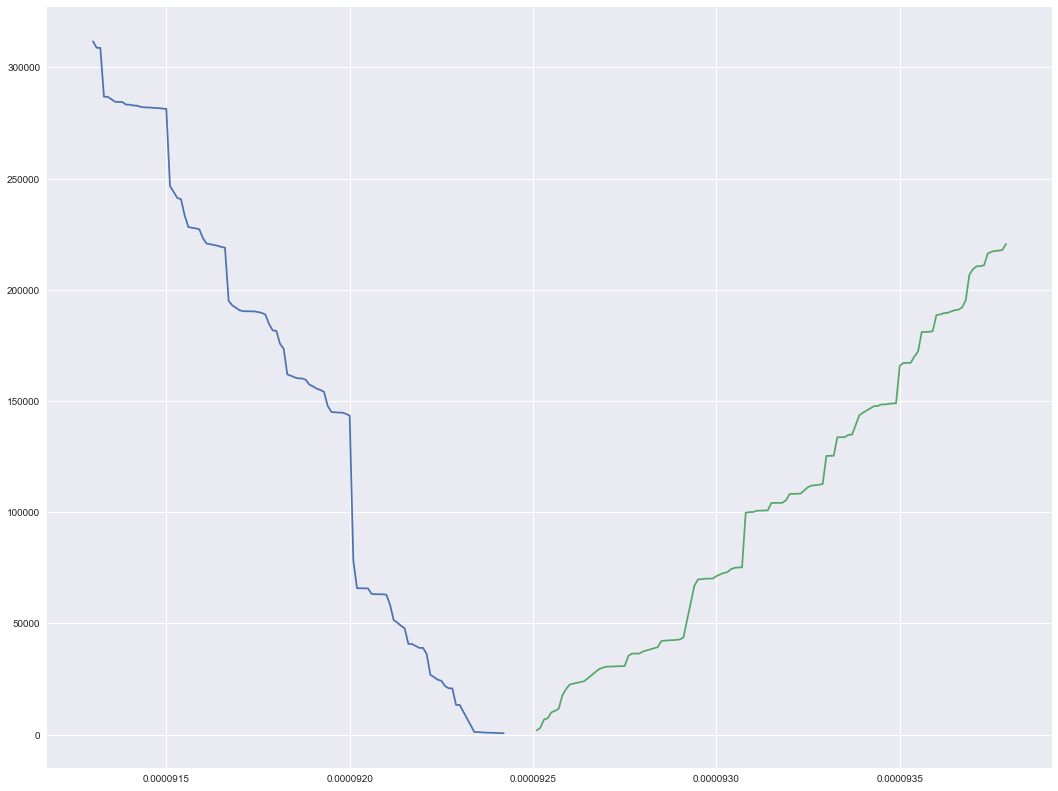

In [24]:
plt.plot(ordered_by_bid['bid_price'],ordered_by_bid['cumulative'])
plt.plot(ordered_by_ask['ask_price'],ordered_by_ask['cumulative'])

### Compressed/Aggregate trades list


In [25]:
agg_trades = requests.get('https://api.binance.com/api/v1/aggTrades', params=symbol_payload)

In [26]:
agg_trades.json()

[{'M': True,
  'T': 1524955330341,
  'a': 15662489,
  'f': 19013670,
  'l': 19013671,
  'm': True,
  'p': '0.00009251',
  'q': '2215.00000000'},
 {'M': True,
  'T': 1524955330341,
  'a': 15662490,
  'f': 19013672,
  'l': 19013674,
  'm': True,
  'p': '0.00009250',
  'q': '4805.00000000'},
 {'M': True,
  'T': 1524955330470,
  'a': 15662491,
  'f': 19013675,
  'l': 19013675,
  'm': False,
  'p': '0.00009262',
  'q': '19.00000000'},
 {'M': True,
  'T': 1524955332786,
  'a': 15662492,
  'f': 19013676,
  'l': 19013676,
  'm': False,
  'p': '0.00009262',
  'q': '32.00000000'},
 {'M': True,
  'T': 1524955332901,
  'a': 15662493,
  'f': 19013677,
  'l': 19013677,
  'm': False,
  'p': '0.00009262',
  'q': '8.00000000'},
 {'M': True,
  'T': 1524955332901,
  'a': 15662494,
  'f': 19013678,
  'l': 19013678,
  'm': False,
  'p': '0.00009268',
  'q': '107.00000000'},
 {'M': True,
  'T': 1524955332901,
  'a': 15662495,
  'f': 19013679,
  'l': 19013680,
  'm': False,
  'p': '0.00009269',
  'q': '85.00

### Kline/Candlesticks

In [27]:
candlesticks = requests.get('https://api.binance.com/api/v1/klines', params=kline_payload)

In [28]:
candlesticks.json()

[[1509321600000,
  '0.00002246',
  '0.00004598',
  '0.00002246',
  '0.00002700',
  '47516757.00000000',
  1509926399999,
  '1341.75651924',
  23510,
  '21213855.00000000',
  '603.28465082',
  '4531877.85380400'],
 [1509926400000,
  '0.00002700',
  '0.00003638',
  '0.00002663',
  '0.00003275',
  '71490738.00000000',
  1510531199999,
  '2130.89221090',
  41370,
  '32996299.00000000',
  '984.53319296',
  '7789992.20566900'],
 [1510531200000,
  '0.00003274',
  '0.00006250',
  '0.00002702',
  '0.00002880',
  '177324849.00000000',
  1511135999999,
  '5383.66525766',
  65347,
  '82711772.00000000',
  '2517.01945312',
  '22234275.69443300'],
 [1511136000000,
  '0.00002882',
  '0.00003081',
  '0.00002576',
  '0.00002645',
  '254326253.00000000',
  1511740799999,
  '7359.26560456',
  87043,
  '127551906.00000000',
  '3693.58021722',
  '31239995.27807200'],
 [1511740800000,
  '0.00002649',
  '0.00002863',
  '0.00001997',
  '0.00002186',
  '263887392.00000000',
  1512345599999,
  '6382.55268688',


In [29]:
candlesticks_clean = [[float(el) for el in candlestick[0:5]] for candlestick in candlesticks.json()]

In [30]:
candlesticks_clean

[[1509321600000.0, 2.246e-05, 4.598e-05, 2.246e-05, 2.7e-05],
 [1509926400000.0, 2.7e-05, 3.638e-05, 2.663e-05, 3.275e-05],
 [1510531200000.0, 3.274e-05, 6.25e-05, 2.702e-05, 2.88e-05],
 [1511136000000.0, 2.882e-05, 3.081e-05, 2.576e-05, 2.645e-05],
 [1511740800000.0, 2.649e-05, 2.863e-05, 1.997e-05, 2.186e-05],
 [1512345600000.0, 2.191e-05, 2.22e-05, 2e-08, 1.529e-05],
 [1512950400000.0, 1.527e-05, 5.89e-05, 1.4e-05, 3.749e-05],
 [1513555200000.0, 3.75e-05, 9.758e-05, 3.653e-05, 7.18e-05],
 [1514160000000.0, 7.186e-05, 0.00019651, 6.004e-05, 0.00014299],
 [1514764800000.0, 0.00014296, 0.00022968, 0.00012, 0.0001686],
 [1515369600000.0, 0.0001686, 0.0001893, 0.00011904, 0.00013401],
 [1515974400000.0, 0.00013416, 0.000147, 8.4e-05, 0.00011827],
 [1516579200000.0, 0.00011828, 0.00012803, 0.00010524, 0.00011589],
 [1517184000000.0, 0.00011588, 0.000117, 8.5e-05, 9.931e-05],
 [1517788800000.0, 9.95e-05, 0.00013797, 9.2e-05, 0.0001186],
 [1518393600000.0, 0.00011865, 0.00012549, 0.000102, 

In [31]:
candlesticks_df = pd.DataFrame(candlesticks_clean, columns=['Opentime','Open','High','Low','Close'])

In [32]:
candlesticks_df = candlesticks_df

In [33]:
candlesticks_df

,Opentime,Open,High,Low,Close
0,1.509322e+12,0.000022,0.000046,2.246000e-05,0.000027
1,1.509926e+12,0.000027,0.000036,2.663000e-05,0.000033
2,1.510531e+12,0.000033,0.000063,2.702000e-05,0.000029
3,1.511136e+12,0.000029,0.000031,2.576000e-05,0.000026
4,1.511741e+12,0.000026,0.000029,1.997000e-05,0.000022
5,1.512346e+12,0.000022,0.000022,2.000000e-08,0.000015
6,1.512950e+12,0.000015,0.000059,1.400000e-05,0.000037
7,1.513555e+12,0.000037,0.000098,3.653000e-05,0.000072
8,1.514160e+12,0.000072,0.000197,6.004000e-05,0.000143
9,1.514765e+12,0.000143,0.000230,1.200000e-04,0.000169


In [34]:
trace = go.Candlestick(x=candlesticks_df['Opentime'],
                       open=candlesticks_df['Open'],
                       high=candlesticks_df['High'],
                       low=candlesticks_df['Low'],
                       close=candlesticks_df['Close'])

In [35]:
data = [trace]
layout = {
    'title': 'The Great Recession',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Increase Period Begins'
    }]
}
fig = dict(data=data, layout=layout)

In [36]:
ax = sns.boxplot(x=candlesticks_df['Opentime'], y='')

ValueError: Could not interpret input ''

### Recent Trades List

In [37]:
trades = requests.get('https://api.binance.com/api/v1/trades', params=symbol_payload)

In [38]:
convert_time(min([trade['time'] for trade in trades.json()]))

'2018-04-28 18:43:50'

In [39]:
convert_time(max([trade['time'] for trade in trades.json()]))

'2018-04-28 18:50:01'

In [40]:
trade_lists = [[trade['id'], trade['isBestMatch'], trade['isBuyerMaker'], trade['price'], trade['qty'], trade['time']] for trade in trades.json()]

In [41]:
trade_df = pd.DataFrame(trade_lists, columns=['id','isBestMatch','isBuyerMaker','price','qty','time'])

In [42]:
trade_df = trade_df.sort_values('time')

In [43]:
trade_df[['price','qty']] = trade_df[['price','qty']].astype(float) 

In [44]:
trade_df.head()

,id,isBestMatch,isBuyerMaker,price,qty,time
0,19013800,True,False,0.000093,375.0,1524955430567
1,19013801,True,True,0.000093,211.0,1524955430921
2,19013802,True,True,0.000093,14.0,1524955431079
3,19013803,True,False,0.000093,546.0,1524955432403
4,19013804,True,True,0.000093,86.0,1524955432427


In [45]:
trade_df.describe()

,id,price,qty,time
count,5.000000e+02,5.000000e+02,500.000000,5.000000e+02
mean,1.901405e+07,9.248282e-05,562.338000,1.524956e+12
std,1.444818e+02,7.636958e-08,1477.590382,8.225407e+04
min,1.901380e+07,9.230000e-05,1.000000,1.524955e+12
25%,1.901392e+07,9.241000e-05,14.000000,1.524956e+12
50%,1.901405e+07,9.250000e-05,88.000000,1.524956e+12
75%,1.901417e+07,9.254000e-05,415.500000,1.524956e+12
max,1.901430e+07,9.264000e-05,19370.000000,1.524956e+12


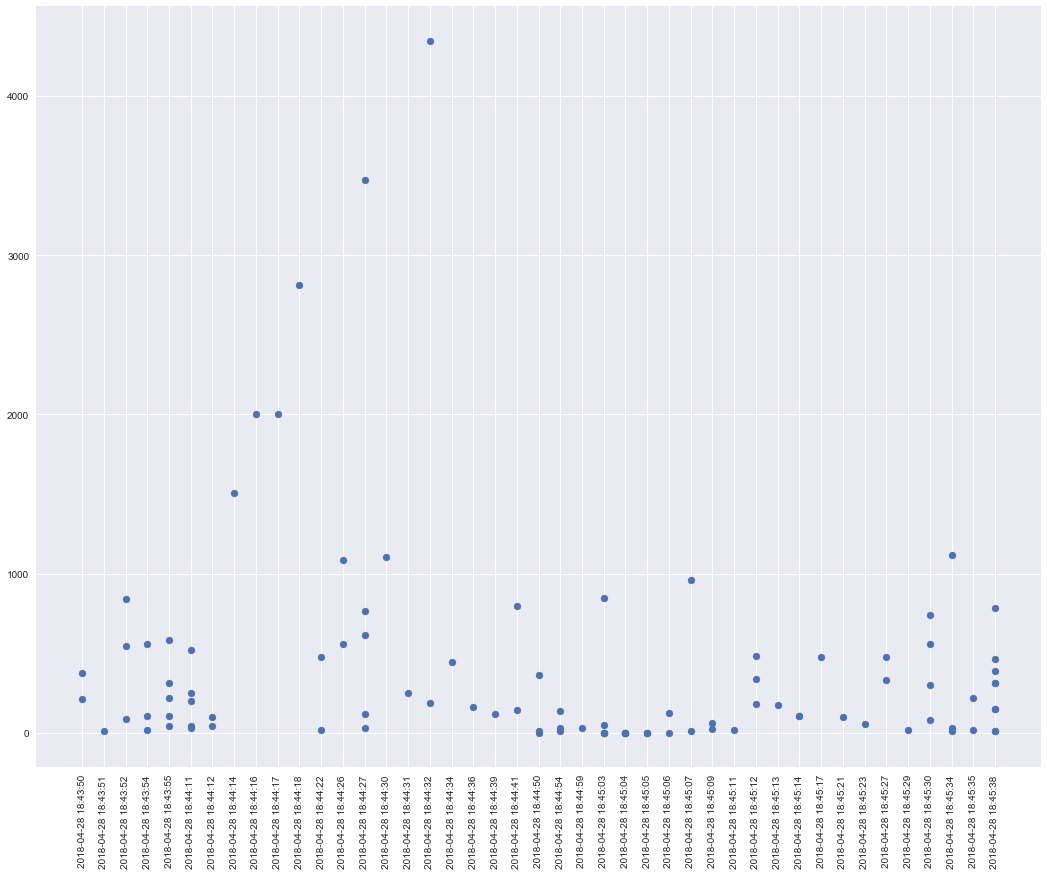

In [46]:
plt.xticks(rotation=90)
plt.scatter(trade_df['time'].head(100).apply(lambda t: convert_time(t)), trade_df['qty'].head(100))